# 27일차
## 개요
- Threshold 튜닝
- Precision, Recall 차이 이해

In [1]:
import pandas as pd
df=pd.read_csv('C:/portfolio/code/week4/day6/학생성적분포.csv')
df

,이름,성별,나이,수면시간,하루공부시간,SNS사용시간,아침식사빈도,중간,기말,과제,총점,학점,A등급여부
0,학생1,남,21,6.1,3.9,2.8,2,74,90,92,85.8,A+,1
1,학생2,여,25,6.9,3.4,1.0,3,87,93,61,81.6,A0,1
2,학생3,남,20,5.3,4.1,1.8,0,64,47,62,56.6,C,0
3,학생4,남,22,6.1,4.4,2.4,0,74,66,96,77.4,A-,1
4,학생5,남,22,6.1,2.6,1.7,1,64,66,47,59.7,C,0
5,학생6,여,25,8.0,2.5,1.7,6,68,73,54,65.8,B0,0
6,학생7,남,24,6.8,3.3,3.6,6,57,60,83,66.0,B0,0
7,학생8,남,24,5.1,2.3,3.5,5,85,69,87,79.2,A-,1
8,학생9,남,25,4.3,3.7,2.1,1,57,72,96,74.7,B+,0
9,학생10,여,24,5.5,3.4,2.4,2,41,67,75,61.6,B-,0


### 데이터 준비 (x, y 분리)

In [2]:
x=df[['수면시간', '하루공부시간','SNS사용시간','아침식사빈도']]
y=df['A등급여부']

### 표준화

In [3]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

### test, train셋 나누기

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.3, stratify=y, random_state=42) 
#stratify=y : train/test분할시 y값의 클래스 비율 유지


### 로지스틱 모델 학습

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 예측 점수 출력

In [6]:
y_scores = model.decision_function(x_test)
# vs model.predict(x_test) : 입력을 넣으면 0 or 1이라는 최종 예측 클레스를 뱉는다
# model.decison_function : 의사결정 경계선과 얼마나 멀리 떨어져있는지 알려줌. threshold튜닝시 사용
# 때문에, precison_score 등 출력시 model.predict는 곧바로 ㅊ출력 되지만, model.decison_function은 threshold경계값 설정이 필요

### ROC curve + AUC 계산

In [7]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#fpr : 거짓 양성 비율 = FP / (FP + TN)
#tpr : 진짜 양성 비율 = TP / (TP + FN)
auc_score=roc_auc_score(y_test, y_scores)

### ROC curve시각화

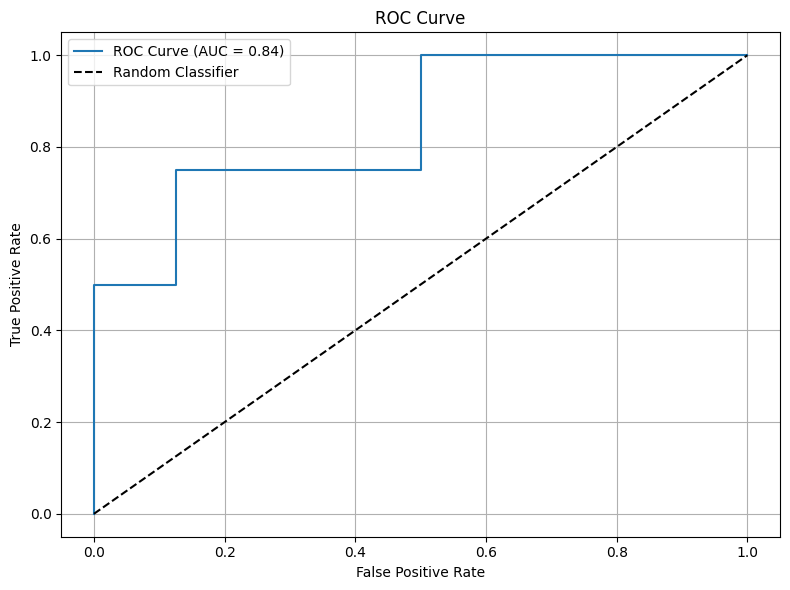

In [8]:
import matplotlib.pyplot as plt
def roc_curve_visual(df):
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label=f'ROC Curve (AUC = {auc_score :.2f})')
    plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
roc_curve_visual(df)


### Precision/Recall vs Threshold 그래프

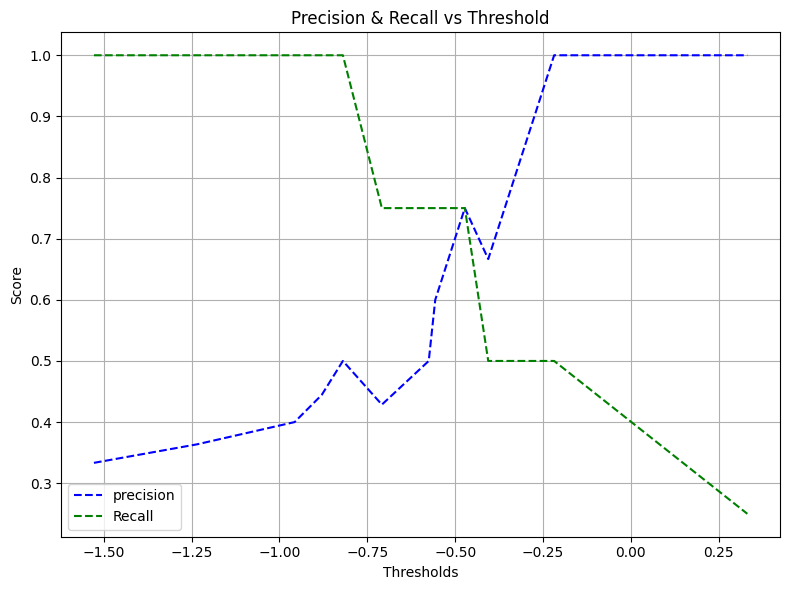

In [10]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_scores)
def precision_recall(df):
    plt.figure(figsize=(8,6))
    plt.plot(pr_thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(pr_thresholds, recalls[:-1], 'g--', label='Recall')
    plt.xlabel('Thresholds')
    plt.ylabel('Score')
    plt.title('Precision & Recall vs Threshold')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
precision_recall(df)

### 특정 Threshold로 예측 + 성능 평가

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

def custom_threshold(score):
    custom_threshold = score
    y_pred_custom = (y_scores >= custom_threshold).astype(int)

    print('confusion matrix : \n', confusion_matrix(y_test, y_pred_custom))
    print('classification report : \n', classification_report(y_test, y_pred_custom))
custom_threshold(- 0.5)

# 이 모델은 누가 A등급을 받을 사람인지 예측하는 모델임. 따라서, 정밀도 보다는 재현율(recall) 예측 중심

confusion matrix : 
 [[7 1]
 [1 3]]
classification report : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.75      0.75      0.75         4

    accuracy                           0.83        12
   macro avg       0.81      0.81      0.81        12
weighted avg       0.83      0.83      0.83        12



In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(threshold):
    y_pred = (y_scores >= threshold).astype(int)
    print('정밀도 :',precision_score(y_test, y_pred))
    print('재현율 :', recall_score(y_test, y_pred))
evaluate_model(-0.3)

정밀도 : 1.0
재현율 : 0.5
